In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt 
from sklearn import datasets
from sklearn import neural_network
from sklearn import model_selection
from sklearn import metrics

import numpy as np
import matplotlib.pyplot as plt

mnist = datasets.fetch_mldata('MNIST original')

model = neural_network.MLPClassifier(hidden_layer_sizes=(50))
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(mnist.data,mnist.target,train_size=0.7)

C:\Users\moham\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [31]:
model.fit(xtrain,ytrain)
print(model.score(xtest,ytest))

0.9459047619047619


Classe de 4 : 0.0
Prediction : [0.]


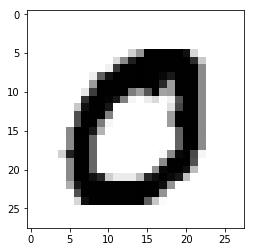

In [21]:
print("Classe de 4 :",mnist.target[4])
print("Prediction :",model.predict(mnist.data[4].reshape(1,-1)))

image = mnist.data.reshape((-1, 28, 28))[4]
plt.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
plt.show() 

In [32]:
ypredTest_pr = model.predict(xtest)
print(metrics.precision_score(ytest, ypredTest_pr,average='micro'))

0.9459047619047619


In [44]:
scores = []
for i in range(2,10):
    
    t = list()

    for x in range(i):
        t.append(10)
    
    model = neural_network.MLPClassifier(hidden_layer_sizes=tuple(t))
    model.fit(xtrain,ytrain)
    
    ypredTest_pr = model.predict(xtest)
    
    score = model.score(xtest,ytest)
    
    scores.append(score)
    
    print("Pour",i,"couches : Score =",score,"/ Predicte score=",metrics.precision_score(ytest, ypredTest_pr,average='micro'))

Pour 2 couches : Score = 0.9015238095238095 / Predicte score= 0.9015238095238095
Pour 3 couches : Score = 0.9222380952380952 / Predicte score= 0.9222380952380952
Pour 4 couches : Score = 0.9217619047619048 / Predicte score= 0.9217619047619048
Pour 5 couches : Score = 0.9 / Predicte score= 0.9
Pour 6 couches : Score = 0.9223333333333333 / Predicte score= 0.9223333333333333
Pour 7 couches : Score = 0.9251904761904762 / Predicte score= 0.9251904761904762
Pour 8 couches : Score = 0.8972857142857142 / Predicte score= 0.8972857142857142
Pour 9 couches : Score = 0.9292857142857143 / Predicte score= 0.9292857142857143


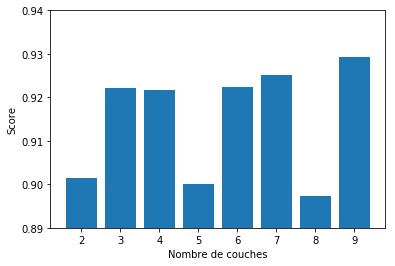

In [47]:
plt.bar(range(2,10),scores)
plt.xlabel('Nombre de couches')
plt.ylabel('Score')
plt.ylim(0.89, 0.94)
plt.show()

In [12]:
import random
import time

errors = []
rands = []
scores = []
times = []
for i in range(1,6):
    start = time.time()
    t = list()
    
    rand = random.randint(10,300)
    
    for x in range(i):
        t.append(rand)
    
    model = neural_network.MLPClassifier(hidden_layer_sizes=tuple(t))
    model.fit(xtrain,ytrain)
    
    ypredTest_pr = model.predict(xtest)
    
    score = model.score(xtest,ytest)
    end = time.time()
    
    ypredTest = model.predict(xtest)
    
    error = metrics.zero_one_loss(ytest, ypredTest)
    
    errors.append(error)
    
    rands.append(rand)
    times.append(end - start)
    scores.append(score)
    
    print("Pour",i,"couches avec",rand," neurons: Score =",score," Temps =",end - start,"error =",error)

Pour 1 couches avec 203  neurons: Score = 0.9565238095238096  Temps = 43.95247220993042 error = 0.043476190476190446
Pour 2 couches avec 275  neurons: Score = 0.9667142857142857  Temps = 113.6341450214386 error = 0.03328571428571425
Pour 3 couches avec 153  neurons: Score = 0.9537619047619048  Temps = 27.601195335388184 error = 0.04623809523809519
Pour 4 couches avec 141  neurons: Score = 0.9611428571428572  Temps = 35.113107204437256 error = 0.03885714285714281
Pour 5 couches avec 177  neurons: Score = 0.9697142857142858  Temps = 125.94622206687927 error = 0.03028571428571425


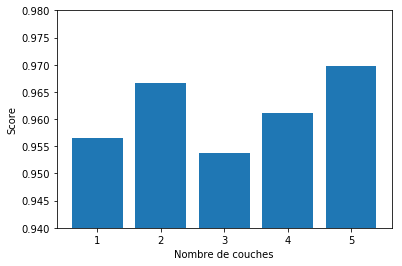

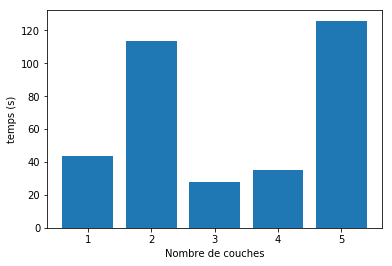

In [13]:
plt.bar(range(1,6),scores)
plt.xlabel('Nombre de couches')
plt.ylabel('Score')
plt.ylim(0.94, 0.98)
plt.show()
plt.bar(range(1,6),times)
plt.xlabel('Nombre de couches')
plt.ylabel('temps (s)')
plt.show()

In [2]:
import time

errors = []
scores = []
times = []
for i in ['lbfgs','sgd','adam']:
    start = time.time()

    model = neural_network.MLPClassifier(hidden_layer_sizes=(50),solver=i)
    model.fit(xtrain,ytrain)
    
    ypredTest_pr = model.predict(xtest)
    
    score = model.score(xtest,ytest)
    end = time.time()
    
    ypredTest = model.predict(xtest)
    
    error = metrics.zero_one_loss(ytest, ypredTest)
    
    errors.append(error)
    
    times.append(end - start)
    scores.append(score)
    
    print("Pour 1 couches avec 50 neurons avec le solver",i,": Score =",score," Temps =",end - start,"error =",error)

Pour 1 couches avec 50 neurons avec le solver lbfgs : Score = 0.9075238095238095  Temps = 110.15145492553711 error = 0.09247619047619049
Pour 1 couches avec 50 neurons avec le solver sgd : Score = 0.8782857142857143  Temps = 57.59201693534851 error = 0.12171428571428566
Pour 1 couches avec 50 neurons avec le solver adam : Score = 0.947  Temps = 54.94607615470886 error = 0.05300000000000005


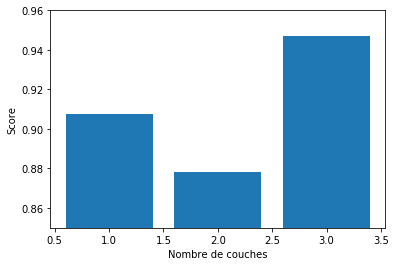

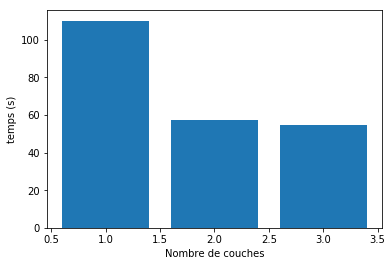

In [7]:
plt.bar(range(1,4),scores)
plt.xlabel('Nombre de couches')
plt.ylabel('Score')
plt.ylim(0.85, 0.96)
plt.show()
plt.bar(range(1,4),times)
plt.xlabel('Nombre de couches')
plt.ylabel('temps (s)')
plt.show()

In [8]:
import time

errors = []
scores = []
times = []
for i in ['identity','logistic','tanh','relu']:
    start = time.time()

    model = neural_network.MLPClassifier(hidden_layer_sizes=(50),activation=i)
    model.fit(xtrain,ytrain)
    
    ypredTest_pr = model.predict(xtest)
    
    score = model.score(xtest,ytest)
    end = time.time()
    
    ypredTest = model.predict(xtest)
    
    error = metrics.zero_one_loss(ytest, ypredTest)
    
    errors.append(error)
    
    times.append(end - start)
    scores.append(score)
    
    print("Pour 1 couches avec 50 neurons avec le activation",i,": Score =",score," Temps =",end - start,"error =",error)

Pour 1 couches avec 50 neurons avec le activation identity : Score = 0.9017142857142857  Temps = 27.579248666763306 error = 0.09828571428571431
Pour 1 couches avec 50 neurons avec le activation logistic : Score = 0.9284761904761905  Temps = 21.67703676223755 error = 0.07152380952380955
Pour 1 couches avec 50 neurons avec le activation tanh : Score = 0.9043809523809524  Temps = 17.053398370742798 error = 0.0956190476190476
Pour 1 couches avec 50 neurons avec le activation relu : Score = 0.9464761904761905  Temps = 37.64531183242798 error = 0.05352380952380953


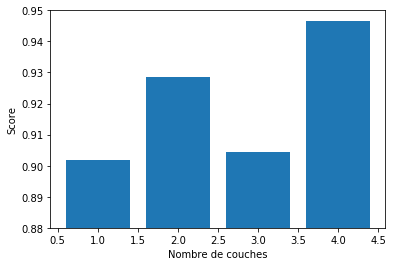

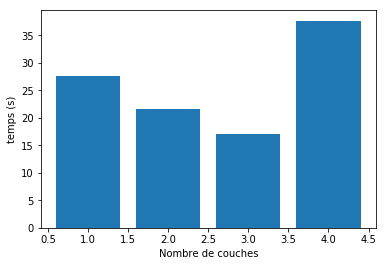

In [11]:
plt.bar(range(1,5),scores)
plt.xlabel('Nombre de couches')
plt.ylabel('Score')
plt.ylim(0.88, 0.95)
plt.show()
plt.bar(range(1,5),times)
plt.xlabel('Nombre de couches')
plt.ylabel('temps (s)')
plt.show()

In [12]:
import time

errors = []
scores = []
times = []
for i in range(1,11):
    start = time.time()

    model = neural_network.MLPClassifier(hidden_layer_sizes=(50),alpha=i/1000)
    model.fit(xtrain,ytrain)
    
    ypredTest_pr = model.predict(xtest)
    
    score = model.score(xtest,ytest)
    end = time.time()
    
    ypredTest = model.predict(xtest)
    
    error = metrics.zero_one_loss(ytest, ypredTest)
    
    errors.append(error)
    
    times.append(end - start)
    scores.append(score)
    
    print("Pour 1 couches avec 50 neurons avec le alpha",i/1000,": Score =",score," Temps =",end - start,"error =",error)

Pour 1 couches avec 50 neurons avec le alpha 0.001 : Score = 0.9476666666666667  Temps = 43.58844447135925 error = 0.05233333333333334
Pour 1 couches avec 50 neurons avec le alpha 0.002 : Score = 0.9503333333333334  Temps = 36.62107515335083 error = 0.04966666666666664
Pour 1 couches avec 50 neurons avec le alpha 0.003 : Score = 0.9449047619047619  Temps = 77.76291704177856 error = 0.055095238095238086
Pour 1 couches avec 50 neurons avec le alpha 0.004 : Score = 0.9485238095238095  Temps = 81.64169263839722 error = 0.05147619047619045
Pour 1 couches avec 50 neurons avec le alpha 0.005 : Score = 0.9516666666666667  Temps = 91.95411849021912 error = 0.04833333333333334
Pour 1 couches avec 50 neurons avec le alpha 0.006 : Score = 0.947952380952381  Temps = 73.80963444709778 error = 0.05204761904761901
Pour 1 couches avec 50 neurons avec le alpha 0.007 : Score = 0.948952380952381  Temps = 113.57456541061401 error = 0.05104761904761901
Pour 1 couches avec 50 neurons avec le alpha 0.008 : Sc

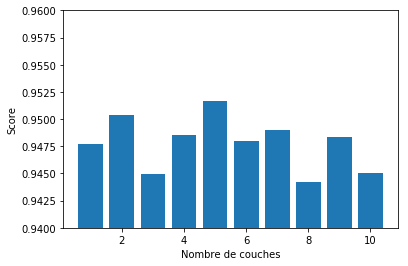

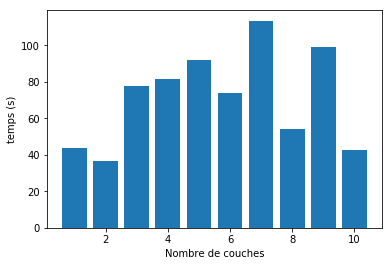

In [15]:
plt.bar(range(1,11),scores)
plt.xlabel('Nombre de couches')
plt.ylabel('Score')
plt.ylim(0.94, 0.96)
plt.show()
plt.bar(range(1,11),times)
plt.xlabel('Nombre de couches')
plt.ylabel('temps (s)')
plt.show()